In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score

In [2]:
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

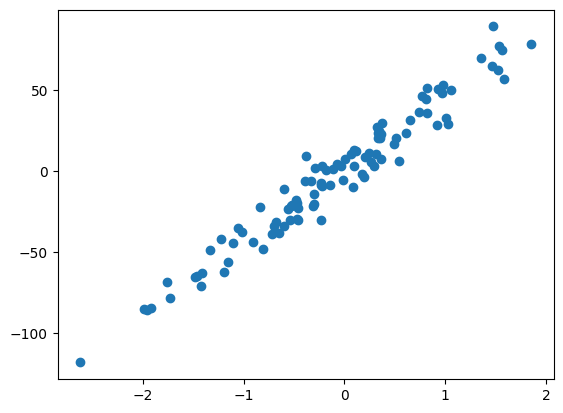

In [4]:
plt.scatter(X, y)
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [6]:
reg.coef_

array([44.24418216])

In [7]:
reg.intercept_

0.09922221422587718

In [9]:
y_pred = reg.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9374151607623286

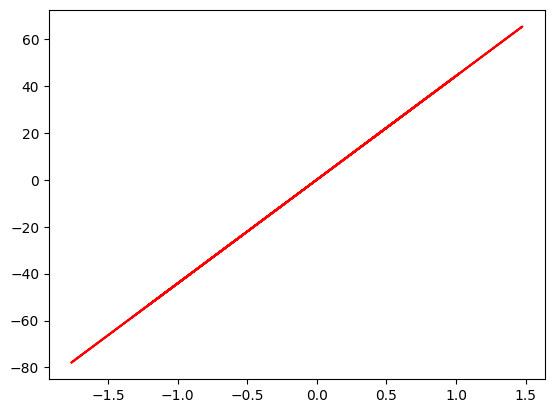

In [14]:
plt.plot(X_test, reg.predict(X_test), color='red')

In [15]:
#our Gradient descent from scratch
class GDRegressor:

    def __init__(self,learning_rate,epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self,X,y):
        # calcualte the b using GD
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())

            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
        print(self.m,self.b)

    def predict(self,X):
        return self.m * X + self.b

In [16]:
gd = GDRegressor(0.01,100)
gd.fit(X_train,y_train)

44.24418215597432 0.09922221422566381


In [17]:
y_pred = gd.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9374151607623272

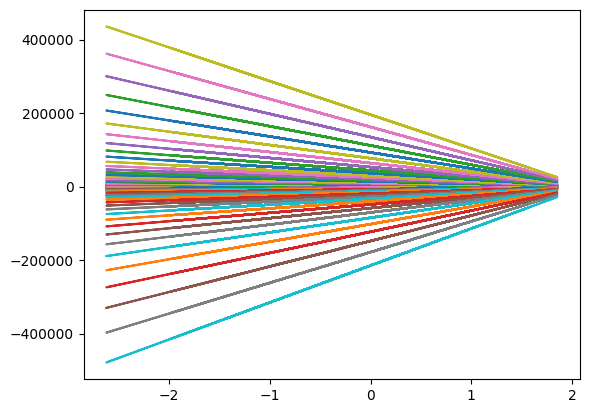

In [27]:
b = -100
m = -120
lr = 0.01

epochs = 100

for i in range(epochs):

  loss_slope_b = -2 * np.sum(y - m*X.ravel() - b)
  loss_slope_m = -2 * np.sum((y - m*X.ravel() - b)*X.ravel())

  b = b - (lr * loss_slope_b)
  m = m - (lr * loss_slope_m)
  y_pred = m * X + b

  plt.plot(X,y_pred)



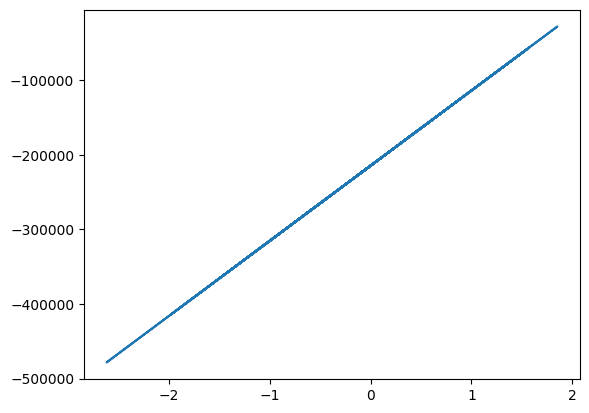

In [28]:
plt.plot(X,y_pred)

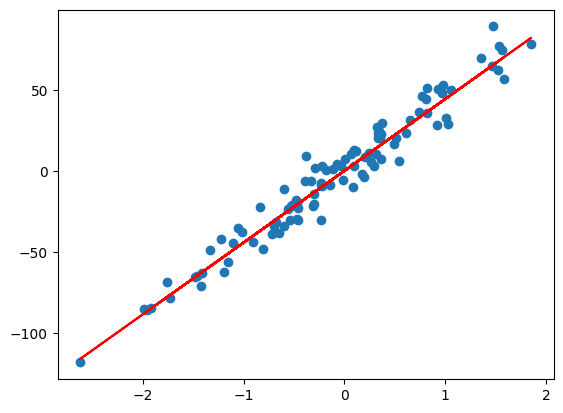

In [26]:
plt.scatter(X,y)
plt.plot(X, reg.predict(X), color='red')